# Diabetes Prediction and Analysis
# Part 1: Data cleaning and transformation
# Part 2: Explotary Data Analysis with Visualizations
# Part 3: Model Building for Diebetes Prediction


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Part 1: Data cleaning and transformation

In [3]:
#importing the datas
diabetes_train = pd.read_csv( "Data/diabetes_train_analysis.csv", sep="," )
diabetes_test = pd.read_csv( "Data/diabetes_test_analysis.csv", sep="," )

diabetes_info_train = pd.read_csv( "Data/diabetes_train_info.csv", sep="," )
diabetes_info_test = pd.read_csv( "Data/diabetes_test_info.csv", sep="," )


In [4]:
#creating one-hot-encoding dummy variables for the cholesterol level labels.
chol_value_list = diabetes_train['gluc'].unique()

diabetes_train['chol_low'] = ( diabetes_train['cholesterol'] == 'low' ).astype(float)
diabetes_train['chol_high'] = ( diabetes_train['cholesterol'] == 'high' ).astype(float)
diabetes_train['chol_medium'] = ( diabetes_train['cholesterol'] == 'medium' ).astype(float)

diabetes_test['chol_low'] = ( diabetes_test['cholesterol'] == 'low' ).astype(float)
diabetes_test['chol_high'] = ( diabetes_test['cholesterol'] == 'high' ).astype(float)
diabetes_test['chol_medium'] = ( diabetes_test['cholesterol'] == 'medium' ).astype(float)

diabetes_train.head()

,id,cholesterol,gluc,smoke,alco,active,pressure,diabetes,chol_low,chol_high,chol_medium
0,56041,low,low,0,0,1,120/80,0,1.0,0.0,0.0
1,83393,low,low,0,0,1,120/80,0,1.0,0.0,0.0
2,29416,high,high,1,0,0,160/110,1,0.0,1.0,0.0
3,55191,low,low,0,0,1,100/70,0,1.0,0.0,0.0
4,42861,low,low,0,0,1,130/80,0,1.0,0.0,0.0


In [5]:
#creating a function that creates one-hot-encoding dummy variables for the purpose of reusing
def one_hot_encoder( df, col_name, cat_values ):  
    for i in list(cat_values):    
        df[f"{col_name}_{i}"] = ( df[col_name] == i ).astype(float)    
    return df

In [6]:
#using one_hot_encoder function for the glucose level label
diabetes_train=one_hot_encoder(diabetes_train, 'gluc', ['low','high', 'medium'] )
diabetes_test=one_hot_encoder(diabetes_test, 'gluc', ['low','high', 'medium'] )
diabetes_train.head()

,id,cholesterol,gluc,smoke,alco,active,pressure,diabetes,chol_low,chol_high,chol_medium,gluc_low,gluc_high,gluc_medium
0,56041,low,low,0,0,1,120/80,0,1.0,0.0,0.0,1.0,0.0,0.0
1,83393,low,low,0,0,1,120/80,0,1.0,0.0,0.0,1.0,0.0,0.0
2,29416,high,high,1,0,0,160/110,1,0.0,1.0,0.0,0.0,1.0,0.0
3,55191,low,low,0,0,1,100/70,0,1.0,0.0,0.0,1.0,0.0,0.0
4,42861,low,low,0,0,1,130/80,0,1.0,0.0,0.0,1.0,0.0,0.0


In [7]:
#separating blood pressure using the lambda function and created two columns for high and low blood pressure measures
diabetes_train['press_high'] = diabetes_train['pressure'].apply( lambda x: x.split("/")[0] ).astype(float)
diabetes_test['press_high'] = diabetes_test['pressure'].apply( lambda x: x.split("/")[0] ).astype(float)

diabetes_train['press_low'] = diabetes_train['pressure'].apply( lambda x: x.split("/")[1] ).astype(float)
diabetes_test['press_low'] = diabetes_test['pressure'].apply( lambda x: x.split("/")[1] ).astype(float)



In [8]:
#adding diabetes_label column
diabetes_train['diabetes_label'] = 'diabetic'
diabetes_train.loc[ diabetes_train['diabetes']==0, 'diabetes_label' ] = 'non-diabetic'

diabetes_train.head()

,id,cholesterol,gluc,smoke,alco,active,pressure,diabetes,chol_low,chol_high,chol_medium,gluc_low,gluc_high,gluc_medium,press_high,press_low,diabetes_label
0,56041,low,low,0,0,1,120/80,0,1.0,0.0,0.0,1.0,0.0,0.0,120.0,80.0,non-diabetic
1,83393,low,low,0,0,1,120/80,0,1.0,0.0,0.0,1.0,0.0,0.0,120.0,80.0,non-diabetic
2,29416,high,high,1,0,0,160/110,1,0.0,1.0,0.0,0.0,1.0,0.0,160.0,110.0,diabetic
3,55191,low,low,0,0,1,100/70,0,1.0,0.0,0.0,1.0,0.0,0.0,100.0,70.0,non-diabetic
4,42861,low,low,0,0,1,130/80,0,1.0,0.0,0.0,1.0,0.0,0.0,130.0,80.0,non-diabetic


In [9]:
#gender has non-consistent labels
diabetes_info_train['gender'].unique()


array(['female', 'm', 'f', 'male'], dtype=object)

In [10]:
#cleaning the gender column the training data

diabetes_info_train.loc[ diabetes_info_train['gender']=='female', 'gender' ] = 'f'
diabetes_info_train.loc[ diabetes_info_train['gender']=='male', 'gender' ] = 'm'
gender_uniq_vals = diabetes_info_train['gender'].unique()
diabetes_info_train = one_hot_encoder( diabetes_info_train, "gender", gender_uniq_vals )



In [11]:
#cleaning the gender column for the test data
diabetes_info_test.loc[ diabetes_info_test['gender']=='female', 'gender' ] = 'f'
diabetes_info_test.loc[ diabetes_info_test['gender']=='male', 'gender' ] = 'm'
diabetes_info_test = one_hot_encoder( diabetes_info_test, "gender", gender_uniq_vals )


In [12]:
#age values have very high numbers (some age information is entered in terms days but some is entered in years)
diabetes_info_train['age'].describe()

count    60000.000000
mean     13604.096283
std       9153.754517
min         30.000000
25%         60.000000
50%      18161.000000
75%      20573.000000
max      23713.000000
Name: age, dtype: float64

In [13]:
#cleaning the age column for the training data
diabetes_info_train['age_2'] = diabetes_info_train['age']
diabetes_info_train.loc[ diabetes_info_train['age'] > 150, 'age_2'] = diabetes_info_train['age'] / 365
diabetes_info_train['age'] = diabetes_info_train['age'].apply( lambda x: math.floor( x ) )
diabetes_info_train.head() 



,id,age,height,weight,gender,gender_f,gender_m,age_2
0,0,18393,168,62.0,f,1.0,0.0,50.391781
1,1,20228,156,85.0,m,0.0,1.0,55.419178
2,2,18857,165,64.0,m,0.0,1.0,51.663014
3,3,48,169,82.0,f,1.0,0.0,48.000000
4,4,47,156,56.0,m,0.0,1.0,47.000000


In [14]:
#cleaning the age column for the test data
diabetes_info_test['age_2'] = diabetes_info_test['age']
diabetes_info_test.loc[ diabetes_info_test['age'] > 150, 'age_2'] = diabetes_info_test['age'] / 365
diabetes_info_test['age'] = diabetes_info_test['age'].apply( lambda x: math.floor( x ) )
diabetes_info_test.head()

,id,age,height,weight,gender,gender_f,gender_m,age_2
0,85656,19149,165,62.0,m,0.0,1.0,52.463014
1,85658,14453,159,67.0,m,0.0,1.0,39.597260
2,85659,15877,168,59.0,m,0.0,1.0,43.498630
3,85660,21228,167,70.0,f,1.0,0.0,58.158904
4,85661,54,163,82.0,f,1.0,0.0,54.000000


In [15]:
#checking weight column for cleanup
diabetes_info_train['weight'].describe()

count    58018.000000
mean        74.186940
std         14.607286
min         10.000000
25%         65.000000
50%         71.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

In [16]:
#checking height column for cleanup
diabetes_info_train['height'].describe()

count    60000.000000
mean       164.348450
std          8.198147
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

In [17]:
#checking the missing values across columns. 
diabetes_train.isna().sum()

id                0
cholesterol       0
gluc              0
smoke             0
alco              0
active            0
pressure          0
diabetes          0
chol_low          0
chol_high         0
chol_medium       0
gluc_low          0
gluc_high         0
gluc_medium       0
press_high        0
press_low         0
diabetes_label    0
dtype: int64

In [18]:
#the weight column has too many missing values, so replaced the missing weigths with average weigth.
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

imp.fit( diabetes_info_train[['weight']] )

diabetes_info_train['weight_2']  = imp.transform( diabetes_info_train[['weight']]  )
diabetes_info_test['weight_2']  = imp.transform( diabetes_info_test[['weight']]  )

In [19]:
#merging the cleaned dataset into the main table for train and test data
diabetes_train = diabetes_train.merge( diabetes_info_train, on=['id'], how='left' )
diabetes_test = diabetes_test.merge( diabetes_info_test, on=['id'], how='left' )

In [20]:
diabetes_train.head()

,id,cholesterol,gluc,smoke,alco,active,pressure,diabetes,chol_low,chol_high,...,press_low,diabetes_label,age,height,weight,gender,gender_f,gender_m,age_2,weight_2
0,56041,low,low,0,0,1,120/80,0,1.0,0.0,...,80.0,non-diabetic,21443,169,73.0,f,1.0,0.0,58.747945,73.0
1,83393,low,low,0,0,1,120/80,0,1.0,0.0,...,80.0,non-diabetic,18374,167,58.0,m,0.0,1.0,50.339726,58.0
2,29416,high,high,1,0,0,160/110,1,0.0,1.0,...,110.0,diabetic,17592,179,118.0,f,1.0,0.0,48.197260,118.0
3,55191,low,low,0,0,1,100/70,0,1.0,0.0,...,70.0,non-diabetic,14687,155,86.0,m,0.0,1.0,40.238356,86.0
4,42861,low,low,0,0,1,130/80,0,1.0,0.0,...,80.0,non-diabetic,64,165,65.0,m,0.0,1.0,64.000000,65.0


# Part 2: Explotary Data Analysis with Visualizations

<Figure size 576x432 with 0 Axes>

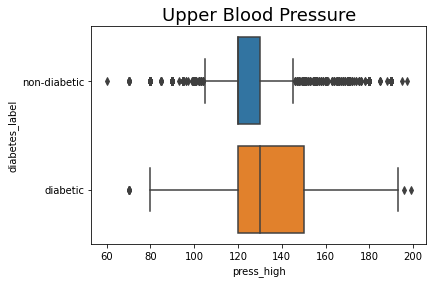

<Figure size 576x432 with 0 Axes>

In [31]:
#Upper blood pressure analysis
sns.boxplot(y=diabetes_train.loc[ (diabetes_train['press_high'] > 50) & (diabetes_train['press_high'] < 200),\
'diabetes_label' ], x=diabetes_train.loc[ (diabetes_train['press_high'] > 50) &(diabetes_train['press_high'] < 200),\
'press_high' ])
plt.title("Upper Blood Pressure", size=18)
plt.figure(figsize=(8,6))

<Figure size 576x432 with 0 Axes>

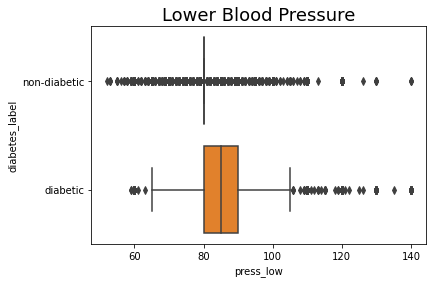

<Figure size 576x432 with 0 Axes>

In [32]:
#lower blood pressure analysis
sns.boxplot(y=diabetes_train.loc[ (diabetes_train['press_low'] > 50) & \
(diabetes_train['press_low'] < 150), 'diabetes_label' ], \
x=diabetes_train.loc[ (diabetes_train['press_low'] > 50) & (diabetes_train['press_low'] < 150), 'press_low' ])
plt.title("Lower Blood Pressure", size=18)
plt.figure(figsize=(8,6))

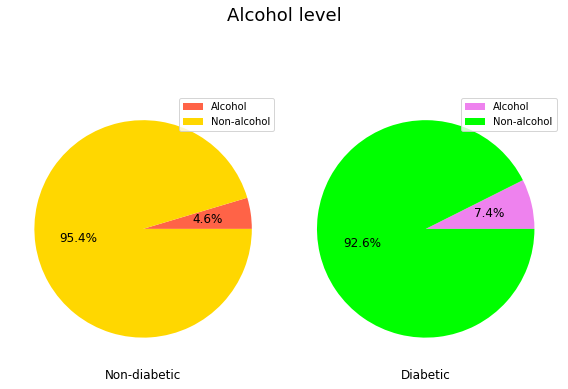

In [417]:
#alcohol consumption analysis
diabetes_train['alco_label'] = 'alcohol'
diabetes_train.loc[ diabetes_train['alco'] == 0, 'alco_label' ] = 'non-alcohol'

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6))
diabetes_train.loc[ diabetes_train['diabetes']==0, : ].groupby('alco_label').size().plot(kind='pie', autopct="%1.1f%%", textprops={'fontsize': 12},
                                  colors=['tomato', 'gold'], ax=ax1, labels= ['', ''])
diabetes_train.loc[ diabetes_train['diabetes']==1, : ].groupby('alco_label').size().plot(kind='pie', autopct="%1.1f%%", textprops={'fontsize': 12},
                                 colors=['violet', 'lime'], ax=ax2, labels= ['', ''])
fig.suptitle('Alcohol level', size=18)
ax1.set_ylabel('', size=22)
ax1.set_xlabel('Non-diabetic', size=12)
ax1.legend(('Alcohol', 'Non-alcohol'))
ax2.set_xlabel('Diabetic', size=12)
ax2.set_ylabel('', size=22)
ax2.legend(('Alcohol', 'Non-alcohol'))
plt.tight_layout()
plt.show()


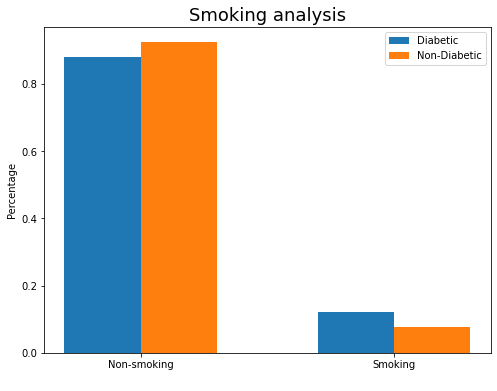

In [24]:
diabetes_train['smoke_label'] = 'smoking'
diabetes_train.loc[ diabetes_train['smoke'] == 0, 'smoke_label' ] = 'non-smoking'
# Numbers of pairs of bars you want
N = 2

# Data on X-axis

# Specify the values of blue bars (height)
diabetic_by_smoke= diabetes_train.loc[ diabetes_train['diabetes']==1, : ].groupby('smoke_label').size()/\
(diabetes_train.loc[ diabetes_train['diabetes']==1, 'diabetes'  ]).count()
# Specify the values of orange bars (height)
non_diabetic_by_smoke= diabetes_train.loc[ diabetes_train['diabetes']==0, : ].groupby('smoke_label').size()/\
(diabetes_train.loc[ diabetes_train['diabetes']==0, 'diabetes'  ]).count()
# Specify the values of orange bars (height)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(8,6))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind,diabetic_by_smoke  , width, label='Diabetic')
plt.bar(ind + width, non_diabetic_by_smoke, width, label='Non-Diabetic')

plt.xlabel(' ')
plt.ylabel('Percentage')
plt.title('Smoking analysis', size=18)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Non-smoking', 'Smoking'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

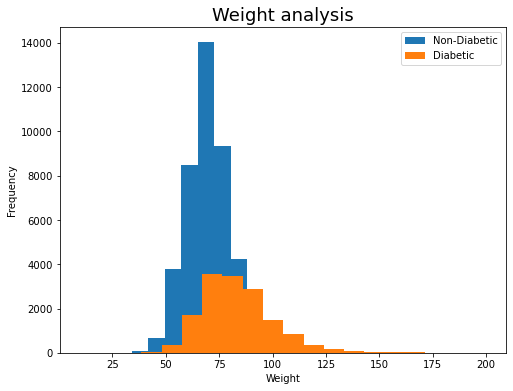

In [28]:
#weigth analysis
diabetic_by_weigth= diabetes_train.loc[ diabetes_train['diabetes']==1, 'weight_2' ].values
non_diabetic_by_weigth= diabetes_train.loc[ diabetes_train['diabetes']==0, 'weight_2' ].values

# Figure size
plt.figure(figsize=(8,6))

# plotting first histogram
plt.hist(non_diabetic_by_weigth, bins=20, label='Non-Diabetic')
 
# plotting second histogram
plt.hist(diabetic_by_weigth, bins=20, label='Diabetic' )

plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Weight analysis', size=18)

plt.legend(loc='best')
 
# Showing the plot using plt.show()
plt.show()

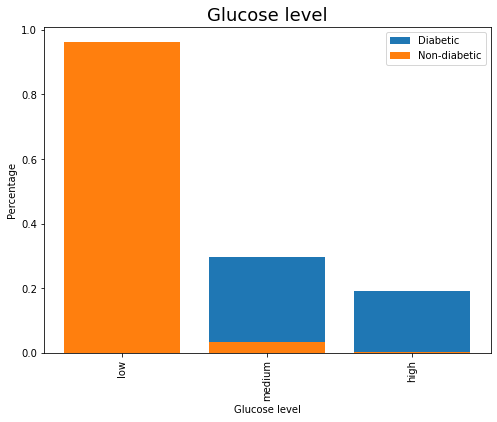

In [29]:
#glucose level analysis
diabetic_by_gluc= diabetes_train.loc[ diabetes_train['diabetes']==1, 'gluc' ].values
non_diabetic_by_gluc= diabetes_train.loc[ diabetes_train['diabetes']==0, 'gluc' ].values
non_diabetic_count=pd.Series(non_diabetic_by_gluc).value_counts()/pd.Series(non_diabetic_by_gluc).count()
diabetic_count=pd.Series(diabetic_by_gluc).value_counts()/pd.Series(diabetic_by_gluc).count()

plt.figure(figsize=(8,6))
plt.bar(['low', 'medium', 'high'], diabetic_count, label="Diabetic")

plt.bar(['low', 'medium', 'high'], non_diabetic_count, label = "Non-diabetic")
plt.xlabel('Glucose level')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.title('Glucose level', size=18)
plt.show()

In [421]:
diabetes_train.head()

,id,cholesterol,gluc,smoke,alco,active,pressure,diabetes,chol_low,chol_high,...,age,height,weight,gender,gender_f,gender_m,age_2,weight_2,alco_label,smoke_label
0,56041,low,low,0,0,1,120/80,0,1.0,0.0,...,21443,169,73.0,f,1.0,0.0,58.747945,73.0,non-alcohol,non-smoking
1,83393,low,low,0,0,1,120/80,0,1.0,0.0,...,18374,167,58.0,m,0.0,1.0,50.339726,58.0,non-alcohol,non-smoking
2,29416,high,high,1,0,0,160/110,1,0.0,1.0,...,17592,179,118.0,f,1.0,0.0,48.197260,118.0,non-alcohol,smoking
3,55191,low,low,0,0,1,100/70,0,1.0,0.0,...,14687,155,86.0,m,0.0,1.0,40.238356,86.0,non-alcohol,non-smoking
4,42861,low,low,0,0,1,130/80,0,1.0,0.0,...,64,165,65.0,m,0.0,1.0,64.000000,65.0,non-alcohol,non-smoking


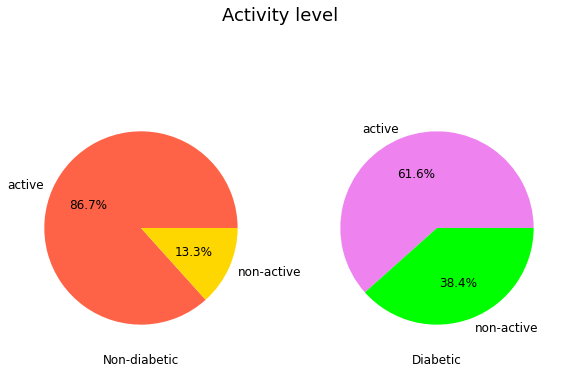

In [422]:
#activity level analysis
diabetes_train['active_label'] = 'active'
diabetes_train.loc[ diabetes_train['active'] == 0, 'active_label' ] = 'non-active'

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6))
diabetes_train.loc[ diabetes_train['diabetes']==0, : ].groupby('active_label').size().plot(kind='pie', autopct="%1.1f%%", textprops={'fontsize': 12},
                                  colors=['tomato', 'gold'], ax=ax1)
diabetes_train.loc[ diabetes_train['diabetes']==1, : ].groupby('active_label').size().plot(kind='pie', autopct="%1.1f%%", textprops={'fontsize': 12},
                                 colors=['violet', 'lime'], ax=ax2)
fig.suptitle('Activity level', size=18)
ax1.set_ylabel('', size=22)
ax1.set_xlabel('Non-diabetic', size=12)
ax2.set_xlabel('Diabetic', size=12)
ax2.set_ylabel('', size=22)
plt.tight_layout()
plt.show()

# Part 3: Model Building for Diebetes Prediction

In [423]:
#identifing the regression columns and targer columns for model training
regressor_columns = [ 'smoke', 'alco', 'active', 'press_high', 'press_low', 'chol_low', 'chol_high', 'chol_medium', 'gluc_low',
       'gluc_high', 'gluc_medium', 'height', 'gender_f', 'gender_m', 'age_2', 'weight_2']

target_column = [ 'diabetes' ]


In [424]:
diabetes_train_x = diabetes_train[ regressor_columns ]
diabetes_train_y = diabetes_train[ target_column ]

diabetes_test_x = diabetes_test[ regressor_columns ]
diabetes_test_y = diabetes_test[ target_column ]

In [425]:
#using the Logistic Regression
clf_logistic = LogisticRegression(random_state=10).fit( diabetes_train_x, diabetes_train_y )

diabetes_test_pred = clf_logistic.predict( diabetes_test_x )

from sklearn.metrics import accuracy_score

accuracy_score( diabetes_test_pred, diabetes_test_y )

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9641

In [426]:
#using Random Forest
clf_RF = RandomForestClassifier(max_depth=19, random_state=0).fit( diabetes_train_x, diabetes_train_y )

diabetes_test_pred_rf = clf_RF.predict( diabetes_test_x )

accuracy_score( diabetes_test_pred_rf, diabetes_test_y )

/var/folders/2l/4sfsfwsj75b983vyd4lrhr6r0000gn/T/ipykernel_75197/3128209373.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_RF = RandomForestClassifier(max_depth=19, random_state=0).fit( diabetes_train_x, diabetes_train_y )


0.9888

Text(0.5, 0, 'Random Forest Classifier Feature Importance')

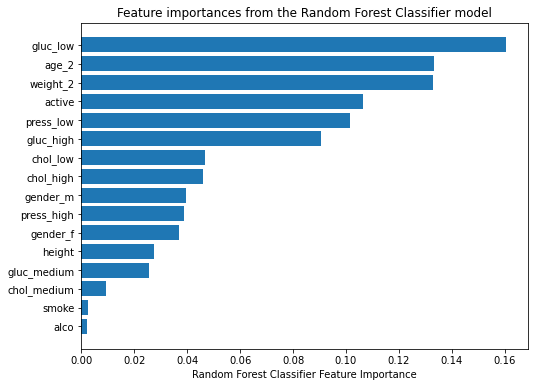

In [427]:
#plotted the feature importances for the regressors
sorted_idx = clf_RF.feature_importances_.argsort()

plt.figure(figsize=(8,6))
plt.title("Feature importances from the Random Forest Classifier model")
plt.barh(np.array(regressor_columns)[sorted_idx], clf_RF.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Classifier Feature Importance")